# Week 3: Assessing Fit(polynomial regression)

In [1]:
import pandas as pd
import numpy as np

## Polynomial function

In [2]:
def polynomial_sframe(feature, degree):
    poly_sframe = pd.DataFrame()
    poly_sframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_sframe[name] = poly_sframe['power_1'].apply(lambda x: x**power)
    return poly_sframe

In [3]:
polynomial_sframe(pd.Series([1, 2, 3]), 4)

,power_1,power_2,power_3,power_4
0,1,1,1,1
1,2,4,8,16
2,3,9,27,81


## Visualizing polynomial regression

In [4]:
sales = pd.read_csv('./kc_house_data.csv')

In [5]:
sales = sales.sort_values(by=['sqft_living', 'price'])

In [6]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [9]:
poly1_data.head()

,power_1,price
19452,290,142000.0
15381,370,276000.0
860,380,245000.0
18379,384,265000.0
4868,390,228000.0


In [10]:
from sklearn.linear_model import LinearRegression

In [14]:
model1 = LinearRegression()
model1.fit(poly1_data['power_1'].to_numpy().reshape(-1, 1), poly1_data['price'].to_numpy().reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
intercept = model1.intercept_
coef = model1.coef_

In [16]:
intercept

array([-43580.74309447])

In [17]:
coef

array([[280.6235679]])

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


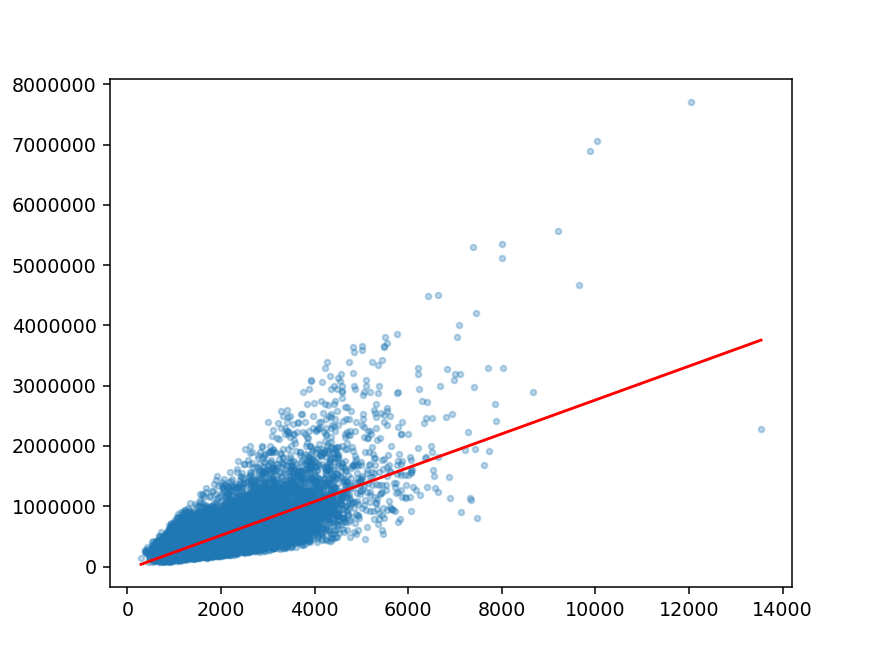

In [25]:
plt.figure()
plt.plot(poly1_data['power_1'], poly1_data['price'], '.', alpha=0.3)
plt.plot(poly1_data['power_1'], model1.predict(poly1_data['power_1'].to_numpy().reshape(-1, 1)), 'r-')

In [27]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.columns
poly2_data['price'] = sales['price']
model2 = LinearRegression()
model2.fit(poly2_data[my_features], poly2_data['price'].to_numpy().reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<IPython.core.display.Javascript object>


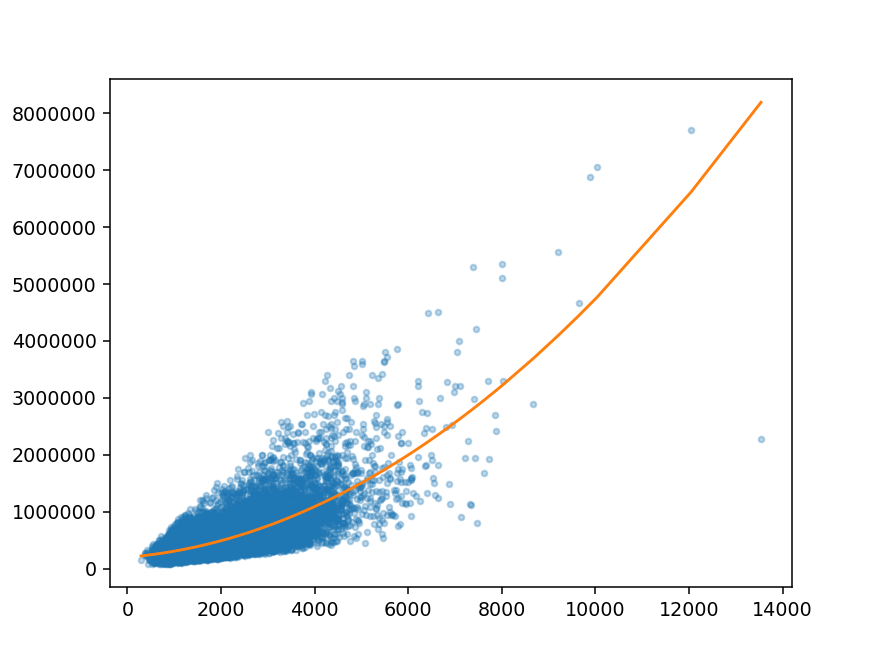

In [28]:
plt.figure()
plt.plot(poly2_data['power_1'], poly2_data['price'], '.', alpha=0.3)
plt.plot(poly2_data['power_1'], model2.predict(poly2_data[my_features]), '-')

## Change the data and re-learning

In [29]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

In [41]:
def predict_plot(data):
    poly15_data = polynomial_sframe(data['sqft_living'], 15)
    my_features = poly15_data.columns
    poly15_data['price'] = data['price']
    model_set_1 = LinearRegression()
    model_set_1.fit(poly15_data[my_features], poly15_data['price'].to_numpy().reshape(-1, 1))
    plt.figure()
    plt.plot(poly15_data['power_1'], poly15_data['price'], '.', alpha=0.3)
    plt.plot(poly15_data['power_1'], model_set_1.predict(poly15_data[my_features]), '-')
    print(list(my_features)[14], model_set_1.coef_[0,14])

<IPython.core.display.Javascript object>


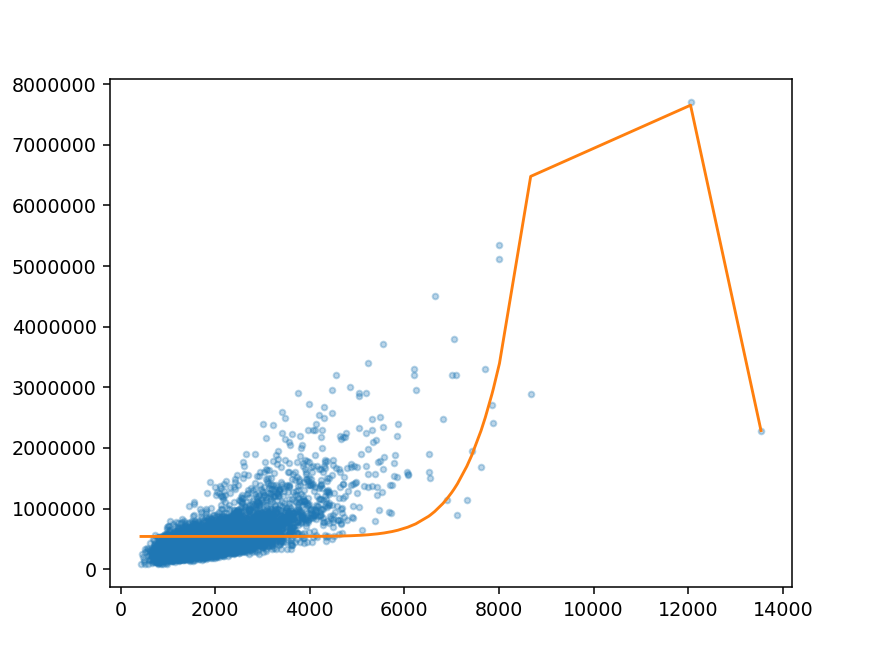

power_15 2.1864111640820643e-52


In [42]:
predict_plot(set_1)

<IPython.core.display.Javascript object>


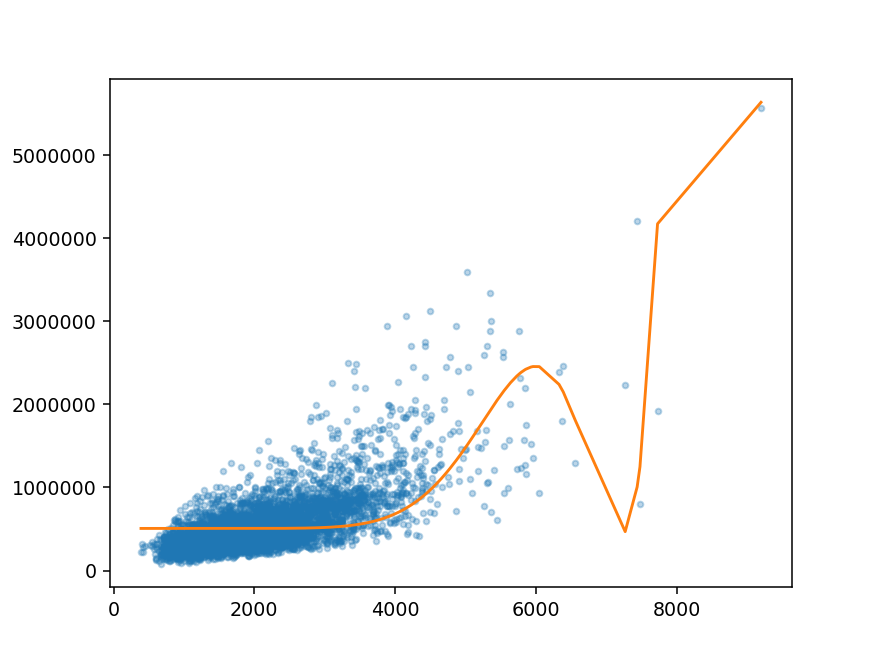

power_15 -1.9647561247054197e-49


In [43]:
predict_plot(set_2)

<IPython.core.display.Javascript object>


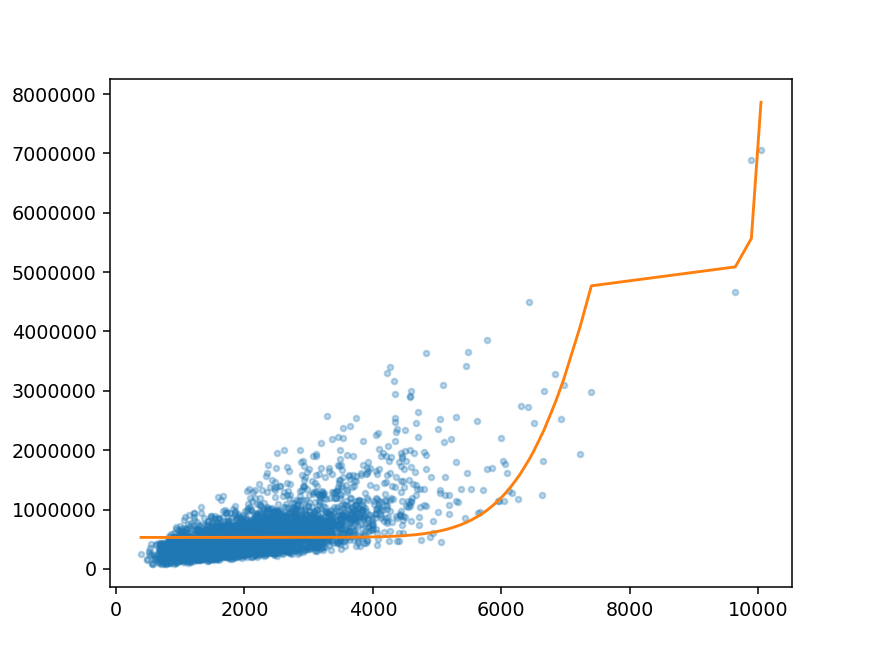

power_15 3.431329320515799e-51


In [44]:
predict_plot(set_3)

<IPython.core.display.Javascript object>


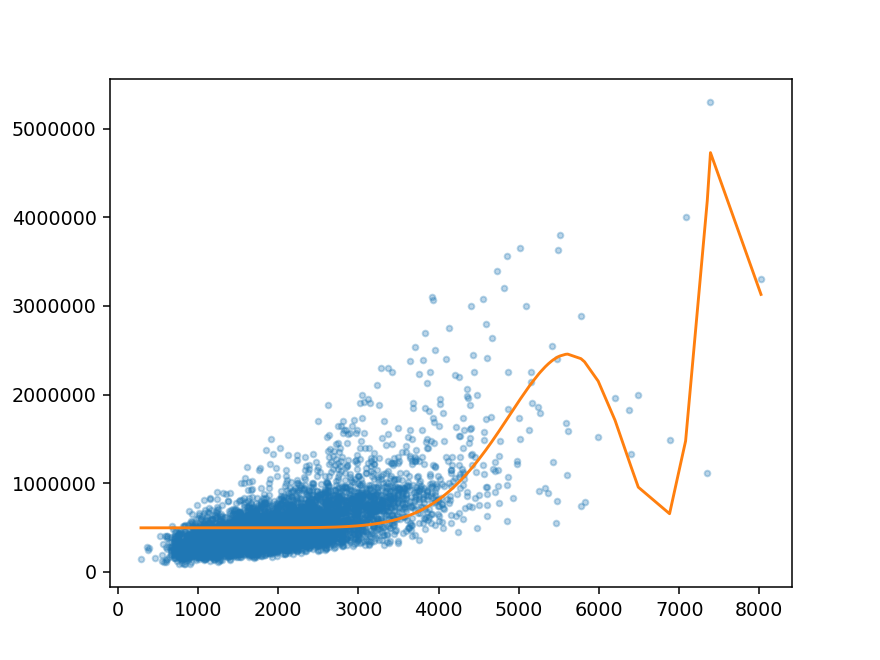

power_15 -6.090728978386525e-49


In [45]:
predict_plot(set_4)

## Selecting a Polynomial Degree

In [46]:
training = pd.read_csv('wk3_kc_house_train_data.csv')
testing = pd.read_csv('wk3_kc_house_test_data.csv')
validation = pd.read_csv('wk3_kc_house_valid_data.csv')

In [48]:
for degree in range(1,15+1):
    poly_data = polynomial_sframe(training['sqft_living'],degree)
    vali_data = polynomial_sframe(validation['sqft_living'],degree)
    my_features = poly_data.columns
    poly_data['price'] = training['price']
    model = LinearRegression()
    model.fit(poly_data[my_features],poly_data['price'].to_numpy().reshape(-1, 1))
    predict = model.predict(vali_data[my_features])
    residual = predict - validation['price'].to_numpy().reshape(-1, 1)
    rss = np.square(residual).sum()
    print(degree,rss)

1 629097886299585.8
2 623955062706517.9
3 625820280251938.0
4 629987339802182.0
5 628275338455675.1
6 566268636125680.1
7 1073830264859396.8
8 7088062452982388.0
9 4.530498182998889e+16
10 2.4725502332498458e+17
11 1.1729782865084923e+18
12 5.272875749204321e+18
13 7.616230021256042e+17
14 2.2975609249255089e+18
15 6.955038096441526e+18


In [50]:
poly_data_6 = polynomial_sframe(training['sqft_living'],6)
test_data = polynomial_sframe(testing['sqft_living'],6)
my_features = poly_data_6.columns
poly_data_6['price'] = training['price']
model_6 = LinearRegression()
model_6.fit(poly_data[my_features],poly_data['price'].to_numpy().reshape(-1, 1))
predict_6 = model_6.predict(test_data[my_features])
residual = predict_6 - testing['price'].to_numpy().reshape(-1, 1)
rss = (residual**2).sum()
rss

135225111833457.84